In [7]:
import chainlit as cl
from typing import TypedDict, List
from langgraph.graph import StateGraph
from langchain_ollama import ChatOllama
from langchain_core.messages import HumanMessage, BaseMessage, AIMessage
import os

# Initialize LLM
llm = ChatOllama(model="qwen2.5", streaming=True)

# Define agent state
class AgentState(TypedDict):
    messages: List[BaseMessage]

# LangGraph node
def llm_node(state: AgentState) -> AgentState:

    response = llm.invoke(state["messages"])
    state["messages"].append(AIMessage(content=response.content))

    print("\nFINAL STATE: ", state)
    return state


# Build LangGraph
graph = StateGraph(AgentState)
graph.add_node("llm", llm_node)
graph.set_entry_point("llm")
graph.set_finish_point("llm")
agent = graph.compile()

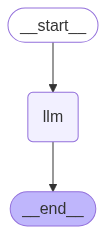

In [8]:
from IPython.display import display, Image
display(Image(agent.get_graph().draw_mermaid_png()))

In [9]:
@cl.on_chat_start
async def on_chat_start():
    await cl.Message(content="👋 Hello! I'm your AI assistant. How can I help you today?").send()